# Entrega 1 - Árboles de Decisión

## Grupo 39
- M. Beiro C.I.: 5.101.639-3
- J. Rodríguez C.I.: 4.328.718-6


## 1. Objetivo

El objetivo de esta tarea es implementar un árbol de decisión utilizando el algoritmo de aprendizaje ID3.

Se pretende escribir el código que genere un árbol de decisión para determinado set de datos y luego poder compararlo con los algoritmos *DecisionTreeClassifier* y *RandomForestClassifier* de la librería *scikit-learn*.

## 2. Diseño

### 2.1 Preprocesamiento de los datos

La base de datos usada es extraída del siguiente link:
https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

En dicho link se encuentra la documentación en donde se puede apreciar que los datos pueden ser enteros, continuos o categóricos.
En la descripción de cada atributo podemos ver que hay algunos cuyos valores enteros tienen una correspondencia con ciertas categorías, por lo que se entiende que indirectamente son categóricos a pesar de que su tipo es entero.

Para los datos de tipo coninuo de deberá discretizar los valores.
Antes de aplicar la discritización se visualiza la cantidad de valores diferentes por columna para ver cómo son los datos.





In [ ]:
import pandas as pd

path = 'data/data.csv'
df_data = pd.read_csv(path, sep=';')

df_cantidad_datos = df_data.nunique()
df_cantidad_datos[df_cantidad_datos>50]

El resultado muestra que las columnas *Curricular units 1st sem (grade)* y *Curricular units 2nd sem (grade)* tienen más de 700 datos diferentes, mientras que la documentación indica que se trata de datos enteros entre 0 y 20. Observando los datos se puede ver que presentan valores decimales, por lo que para estas columnas el tratamiento que se realizará será de redondear las cifras al entero más cercano.

En conclusión se realizarán dos tipos de procesamientos:
1. Redondeo para datos de tipo incorrecto según su documentación.
2. Discretización para datos continuos.

Para ello se implementa el código en el archivo *preprocesamiento.py*, el cual necesita de un archivo de configuración que indique a qué columna se le aplica un determinado procesamiento.
A modo de ejemplo se expone en una tabla ese archivo.

|            columna               | algoritmo| bins |
|:---------------------------------|----------|------|
| Previous qualification (grade)   | bins     | 20   |
| Admission grade                  | bins     | 20   |
| Age at enrollment                | bins     | 10   |
| Curricular units 1st sem (grade) | redondeo | 0    |
| Curricular units 2nd sem (grade) | redondeo | 0    |
| Unemployment rate                | bins     | 10   |
| Inflation rate                   | bins     | 10   |
| GDP                              | bins     | 10   |


Para la discretización por bines se utiliza  la función *KBinsDiscretizer* de la librería *scikit-learn*, a la cual se le indica la cantidad de bines de acuerdo al archivo de configuración.

Adicional a eso se reemplaza los valores 'Enrolled' de la columna 'Target' por el valor 'Graduate' de acuerdo a la letra del problema.

La separación de datos de entrenamiento, validación y testeo se realiza con la función *train_test_split* de la librería *scikit-learn*.



### 2.2 Algoritmo

Para la construcción del árbol de decisión se implementa el algorítmo ID3.

Se parte de la base de un set de datos que contiene la clasificación deseada, la cual llamaremos 'target'.
Dicho algortimo comienza cuestionando qué atributo clasifica mejor a los datos.
Para responder esa pregunta se utiliza la medida de la ganancia de entropía que tiene la siguiente forma:

$$Ganancia (S,A)=Entropia(S) - \sum_{v\in Val(A)} \frac{|S_v|}{|S|}Entropia(S_v) $$

Donde la entropía de un conjunto se calcula como:

$$Entropia(S)=-\sum_{c_i\in C}p_{c_i}.log(p_{c_i})$$

Donde cada $p_{c_i}$ es la proporción de cada valor del atributo target.

Luego se separa el set de datos filtrando por cada valor único del atributo y para cada sub set se realiza el mismo procedimiento recursivamente.

Se utiliza como método de parada dos hiperparámetros llamados *min_split_gain* y *min_samples_split*. El primero determina la gantidad mínima de ganancia que debe aportar un atributo para continuar con la recursividad. En caso que no la cumpla simplemente se crea una hoja con el valor más común del sub set de datos. El segundo hiperparámentro indica cual es la cantidad mínima de datos para seguir adelante con la recursividad. Si el subset de datos no llega a esa cantidad, se crea una hoja con el valor más común.



### 2.3 Evaluación

Para la evaluación del algoritmo se utiliza el set de datos de entrenamiento y validación. Se construirá el árbol de decisión utilizando el método explicado anteriormente sobre el set de entrenamiento. La evaluación de hiperparámetros se realiza utilizando el set de validación.
Luego se utilizará el set de testeo para evaluar el desempeño en función de los aciertos que obtenga cada uno.


In [ ]:
import main

df_data=cargar_datos()
df_preprod_config = cargar_configuracion()
preprocesar_datos(df_data, df_preprod_config)
df_train, df_test, df_validation = separar_train_test(df_data, test_size=0.3, random_state=45)


Para evaluar como varían los resultados en función de los hiperparámetros se realiza el método 'grid serach' y se grafican los resultados.
Se pretende vizualizar el impacto de los mencionados hiperparámetros tanto en la exactitud de la predicción como en la cantidad de hojas del árbol generado.

In [ ]:
import numpy as np

min_samples_split_array = np.arange(5, 200,20)
min_split_gain_array = np.arange(0.03, 0.3, 0.03)

main.evaluar_hiperparametros(df_train, df_test, min_samples_split_array, min_split_gain_array)

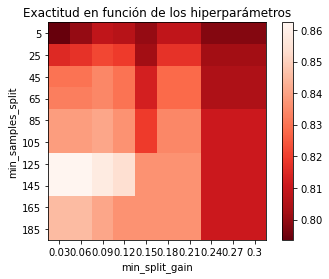


Observando el gráfico podemos elegir los hiperparámetros que funcionan mejor para nuestros datos. Para este caso podemos decidir entre un *min_sample_split* de 125 o 140 y un *min_split_gain* de 0.03 y 0.06.
El criterio a seguir será observar la cantidad de hojas de cada árbol que se generan con los hiperparámetros mencionados anteriormente y quedarse con el de menor cantidad de hojas.


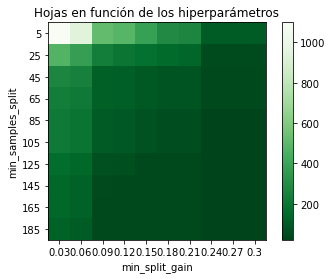

Se observa como la cantidad de hojas de los árboles disminuye a mendida que aumentan los hiperparámetros. Para el caso de nuesetra selección de hiperparámetros nos quedaremos con *min_samples_splip* de 145 y *min_split_gain* de 0.03.

A continuación seteamos cada hiperparámetro al valor elegido y se evalúan las metricas contra los algoritmos DecisionTreeClassifier y RandomForestClassifier de la librería scikit-learn.

In [ ]:
min_samples_split = 125
min_split_gain = 0.09

main.arbol_ID3(df_train, df_test, min_samples_split, min_split_gain)

main.arbol_DTC(df_train, df_test, min_samples_split)

main.arbol_RTF(df_train, df_test, min_samples_split)

Los resultados se muestran en las siguientes tablas:
    
|           | ID3 | DTC  | RFC  |
|----------:|-----|------|------|
|  accuracy | 0.85| 0.87 | 0.87 |

| precision | ID3  | DTC  | RFC  |
|----------:|------|------|------|
| Dropout   | 0.82 | 0.85 | 0.90 |
| Graduate  | 0.85 | 0.88 | 0.86 |

|   recall | ID3  | DTC  | RFC  |
|---------:|------|------|------|
| Dropout  | 0.69 | 0.73 | 0.70 |
| Graduate | 0.93 | 0.94 | 0.96 |

Se pueden observar diferencias en la métricas para los valores de *Target* por un desbalance en las clases.
Se podría probar alguna metodología de sobremuestreo y submuestreo para lograr balancear las clases y evaluar nuevamente los resultados.


Matriz de confusión para ID3:
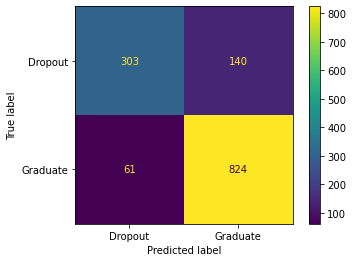

Matriz de confusión para DTC:
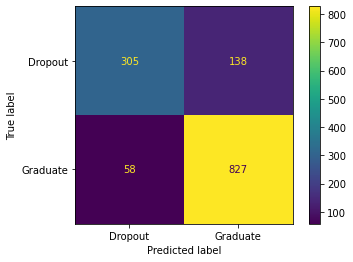

Matriz de confusión para RFT:
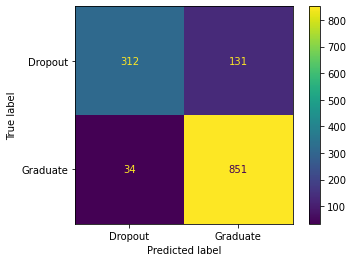

En las imagenes anteriores se observan las matrices de confusión de las predicciones obtenidas en cada clasificador. Se nota de manera clara el desbalance de clases.

## 3. Conclusiones

Si bien los métodos de DecisionTreeClassifier y RandomForestClassifier dan resultados mejores, se obtuvieron resultados cercanos con un algortimo de simple implementación y con mucha explicabilidad.
La incorporación de los hiperparámetros  permite reducir costo computacional a la hora de generar los árboles al conseguir menor cantidad de nodos y hojas. A su vez la evaluación de los resultados variando los hiperparámetros permite seleccionar el mejor modelo evitando un sobreajuste de los datos.